# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Wholesale_Data.csv')

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# check to see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


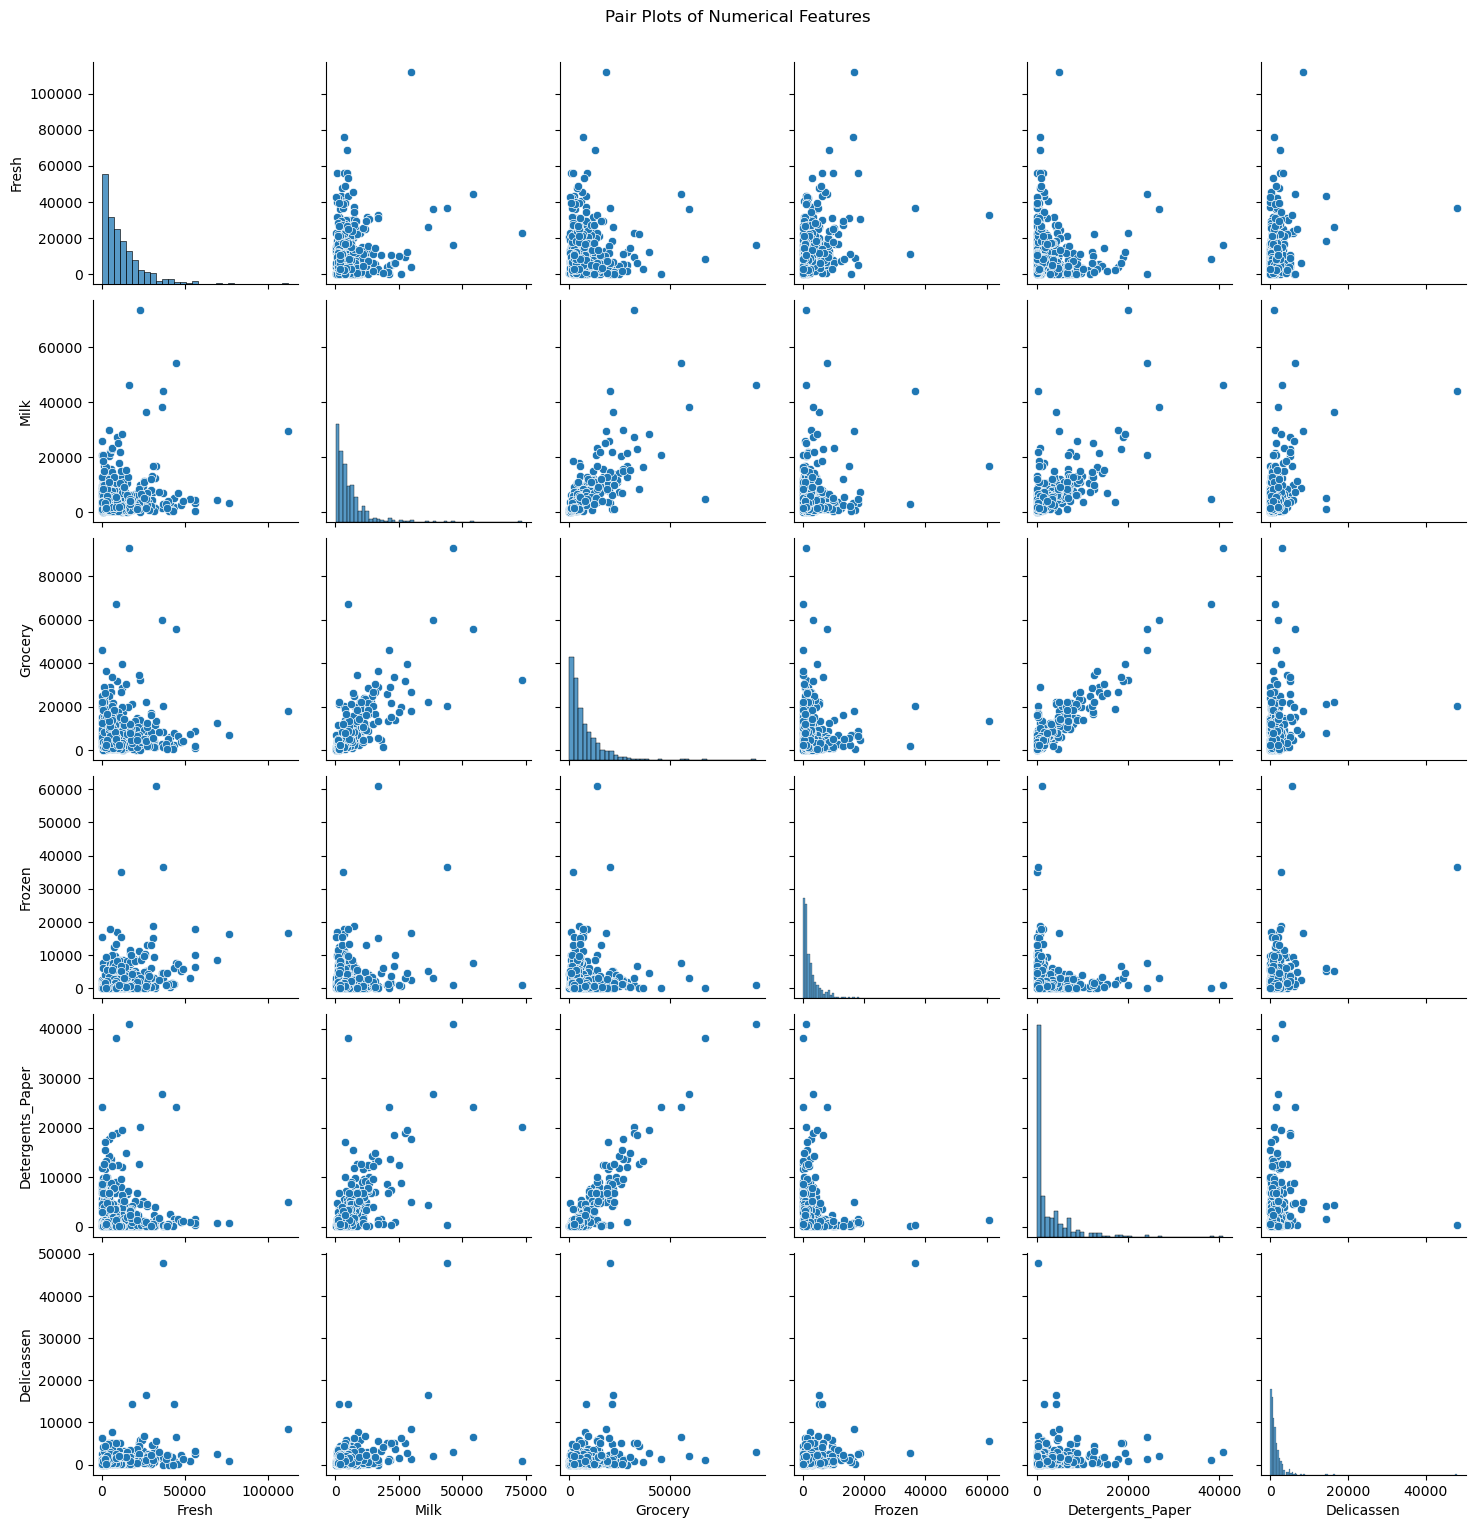

In [6]:
# Create pair plots
sns.pairplot(df.drop(['Channel', 'Region'], axis=1))
plt.suptitle("Pair Plots of Numerical Features", y=1.02)
plt.show()

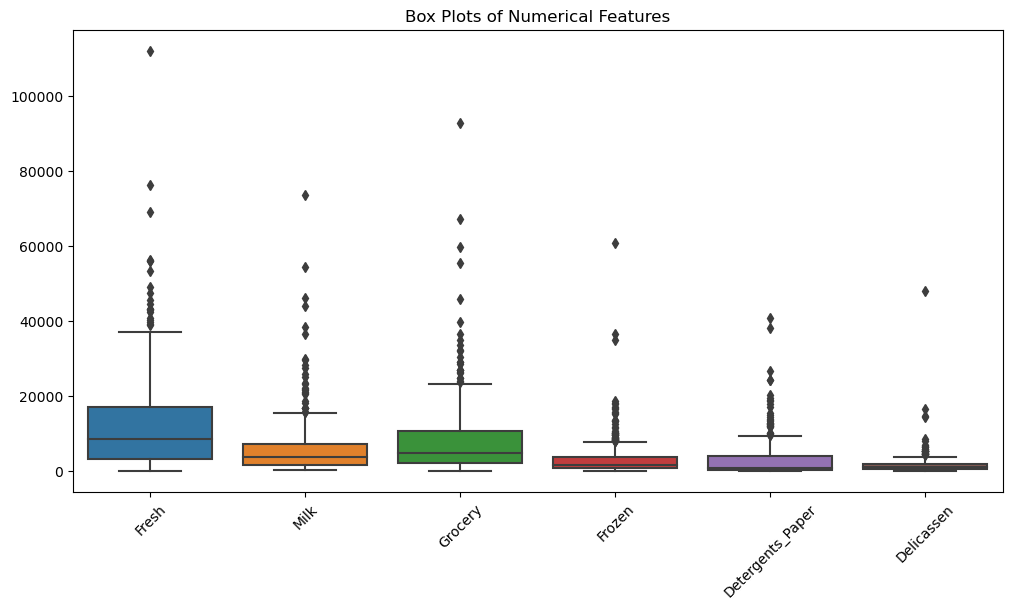

In [7]:
# Box/whisker plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(['Channel', 'Region'], axis=1))
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

We can see plenty of "outliers" from a regular boxplot. I will extend the whisker a bit so that more poitns can be captured and only the extreme outliers remain.

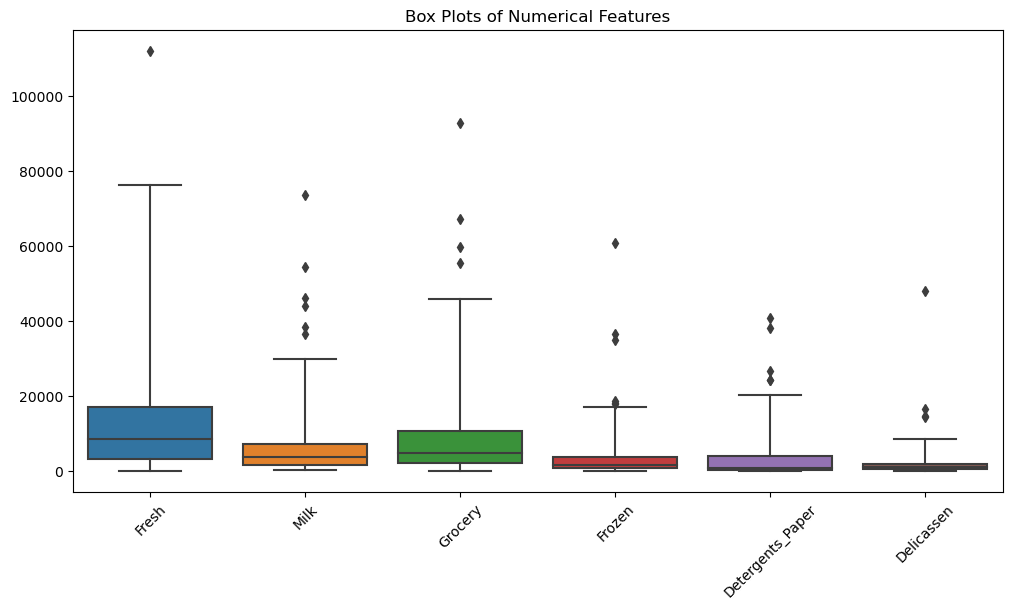

In [8]:
# Box/whisker plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(['Channel', 'Region'], axis=1), whis=5)
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

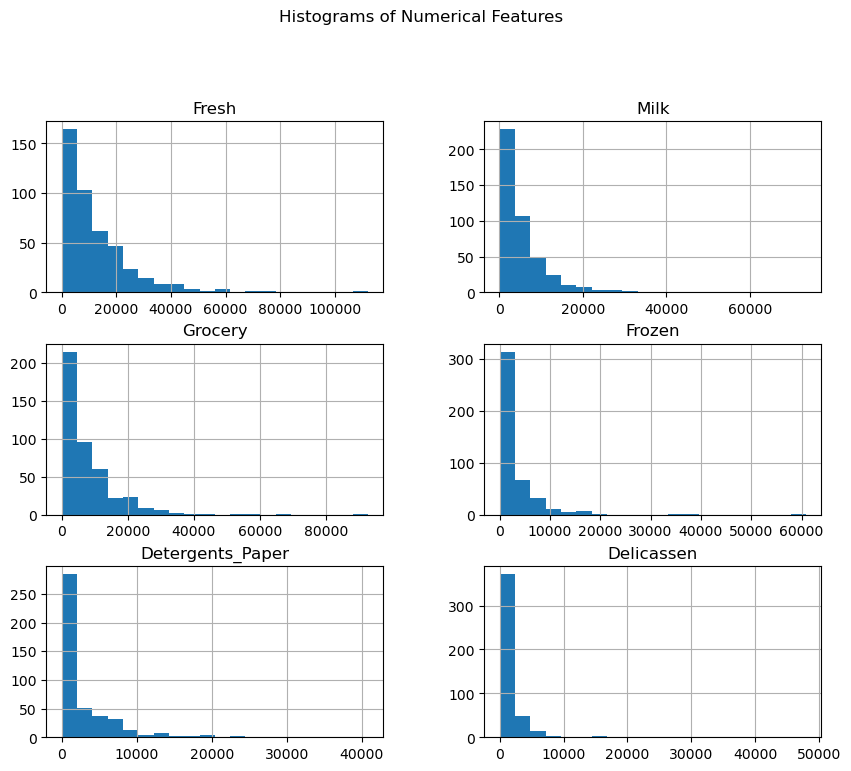

In [9]:
# Create histograms for all numerical features
df.drop(['Channel', 'Region'], axis=1).hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

In [10]:
# Use IQR method to check for outliers

columns_to_check = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# IQR for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# threshold for considering a data point as an outlier
outlier_threshold = 1.5

# Identify potential outliers
potential_outliers = ((df[columns_to_check] < (Q1 - outlier_threshold * IQR)) | 
                     (df[columns_to_check] > (Q3 + outlier_threshold * IQR)))

# Show the rows with potential outliers
outliers_df = df[potential_outliers.any(axis=1)]
outliers_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
17,1,3,5876,6157,2933,839,370,4478
22,1,3,31276,1917,4469,9408,2381,4334
23,2,3,26373,36423,22019,5154,4337,16523
...,...,...,...,...,...,...,...,...
427,1,3,31012,16687,5429,15082,439,1163
431,1,3,8533,5506,5160,13486,1377,1498
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346


In [11]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


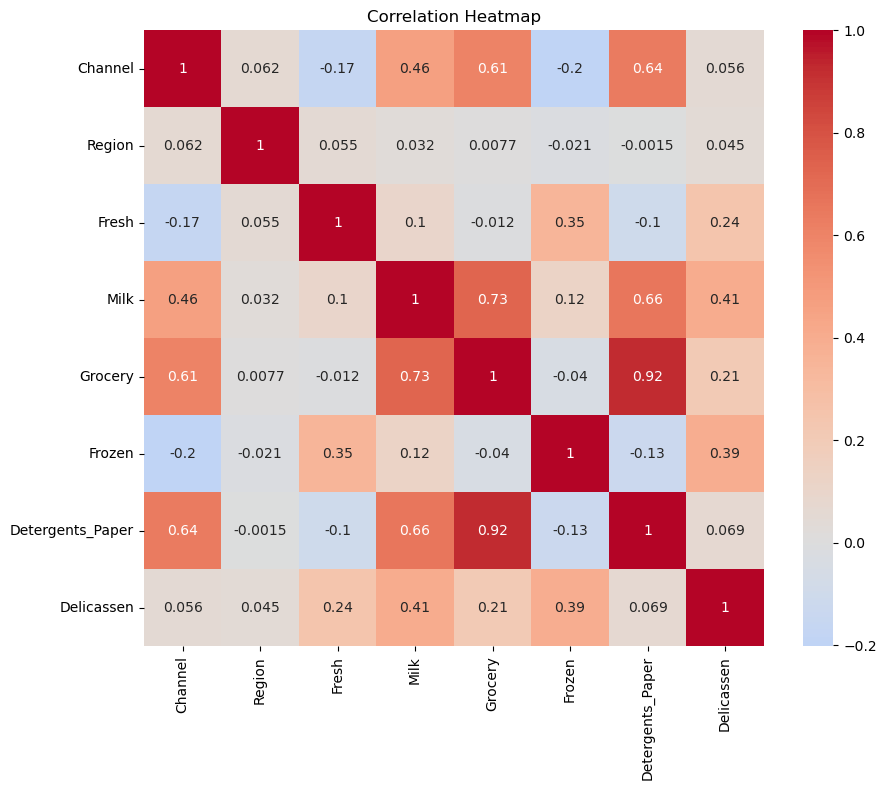

In [12]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Standardize numerical features
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

scaler = StandardScaler()

# Fit and transform the selected features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [14]:
# Normalize numerical features
# Initialize MinMaxScaler
norm_scaler = MinMaxScaler()

# Fit and transform the selected features
df[numerical_columns] = norm_scaler.fit_transform(df[numerical_columns])

In [15]:
# Feature Selection - PCA
pca = PCA()

# Fit PCA and transform the data
pca_result = pca.fit_transform(df[numerical_columns])

In [16]:
pca_result

array([[ 0.02044585, -0.00412432, -0.0163855 , -0.06310367, -0.01937663,
        -0.00121607],
       [ 0.04500329, -0.03688859,  0.02445439, -0.04076951, -0.01227664,
         0.00537645],
       [ 0.04047414, -0.01374597,  0.07912717, -0.06286668,  0.09331431,
        -0.03484407],
       ...,
       [ 0.39394901, -0.01009283, -0.07857145,  0.03851376,  0.01990251,
        -0.00715485],
       [-0.10218494, -0.02453706, -0.006867  , -0.02618328,  0.02501997,
        -0.00458653],
       [-0.09947638, -0.09973339, -0.00363077, -0.01659254, -0.00434683,
         0.00289418]])

In [17]:
# Print explained variance ratio for each component
for component, ratio in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PCA{component}: {ratio:.4f}")

PCA1: 0.5195
PCA2: 0.2641
PCA3: 0.1061
PCA4: 0.0626
PCA5: 0.0350
PCA6: 0.0128


In [18]:
# Feature Selection - RandomForest
target = 'Grocery'
features = ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model and get feature importances
rf_model.fit(df[features], df[target])
feature_importances = rf_model.feature_importances_

In [19]:
# Print feature importances
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

Fresh: 0.0285
Milk: 0.0869
Frozen: 0.0183
Detergents_Paper: 0.8440
Delicassen: 0.0222


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [21]:
import warnings

warnings.filterwarnings("ignore")

In [23]:
# Determine optimal number of clusters - Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[numerical_columns])
    inertia.append(kmeans.inertia_)

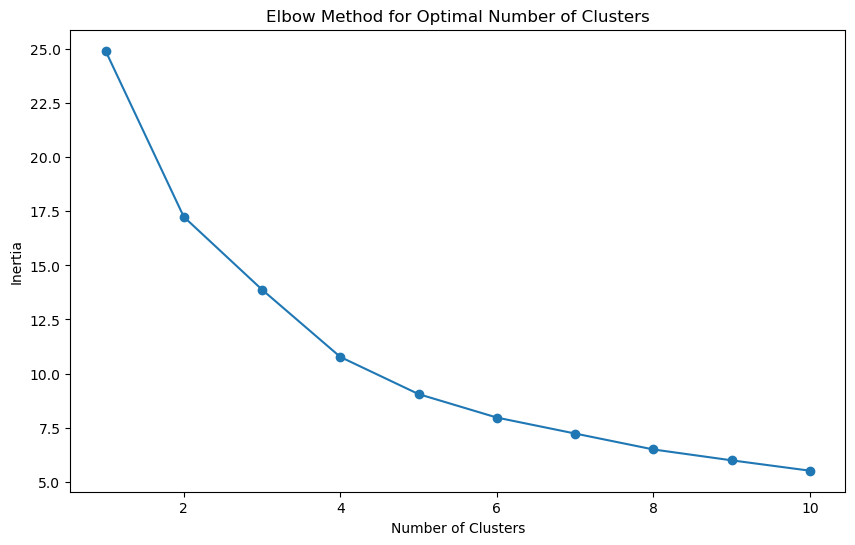

In [24]:
# Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [25]:
# Choose optimal number of clusters based on the elbow point
# I will choose 4 as it seems that is where the elbow point changes so that the slope isn't as drastic 
optimal_clusters = 4

# KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(df[numerical_columns])

# Analyze the clusters
cluster_summary = df.groupby('cluster')[numerical_columns].mean()
print(cluster_summary)

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
cluster                                                                      
0        0.083965  0.041472  0.041734  0.043403          0.024365    0.022047
1        0.051815  0.145674  0.183377  0.023605          0.180126    0.038898
2        0.339717  0.085433  0.069192  0.139613          0.023733    0.069135
3        0.142329  0.471842  0.523124  0.049793          0.609254    0.061322


In [26]:
cluster_summary

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,0.083965,0.041472,0.041734,0.043403,0.024365,0.022047
1,0.051815,0.145674,0.183377,0.023605,0.180126,0.038898
2,0.339717,0.085433,0.069192,0.139613,0.023733,0.069135
3,0.142329,0.471842,0.523124,0.049793,0.609254,0.061322


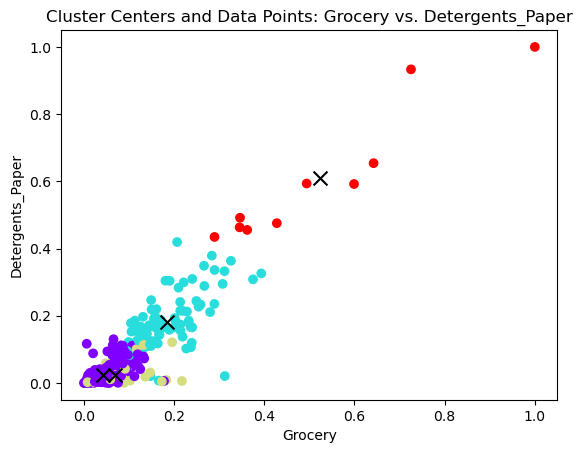

In [28]:
# Plot cluster centers
plt.scatter(df['Grocery'], df['Detergents_Paper'], c=df['cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 4], c='black', marker='x', s=100)
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('Cluster Centers and Data Points: Grocery vs. Detergents_Paper')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

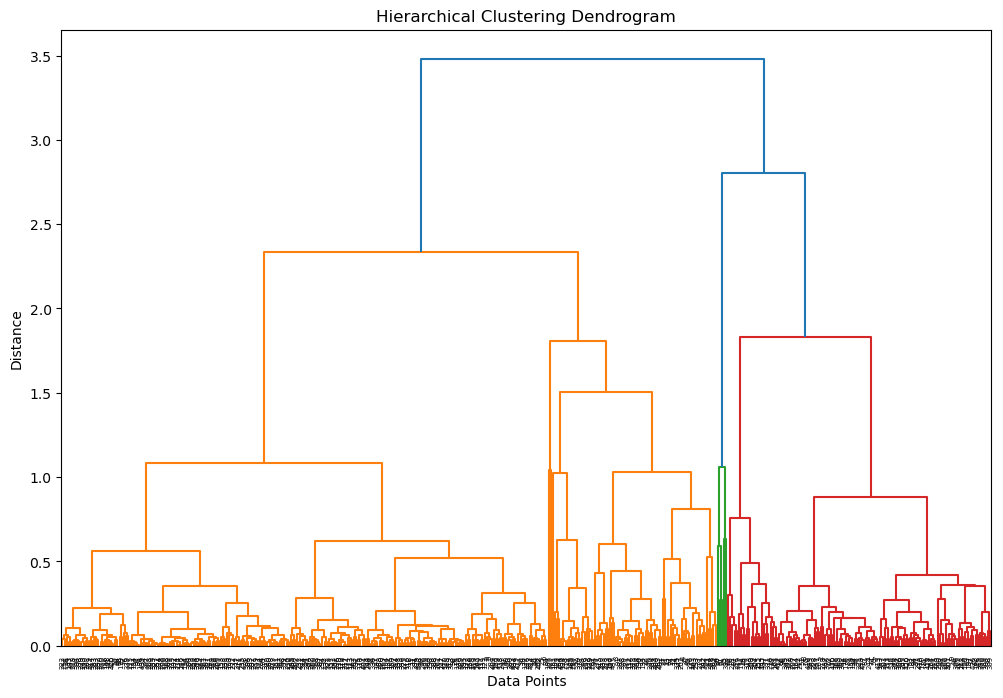

In [31]:
# linkage matrix
linkage_matrix = linkage(df[numerical_columns], method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [35]:
# linkage matrix
linkage_matrix = linkage(df[numerical_columns], method='ward')

# Set the desired number of clusters based on dendrogram visualization
desired_clusters = 4

# Assign data points to clusters using fcluster
cluster_assignments = fcluster(linkage_matrix, t=desired_clusters, criterion='maxclust')

# Add cluster assignments to the DF
df['cluster'] = cluster_assignments

# Analyze the clusters
cluster_summary = df.groupby('cluster')[numerical_columns].mean()
print(cluster_summary)

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
cluster                                                                      
1        0.088432  0.034860  0.035340  0.034076          0.016905    0.019766
2        0.256002  0.092402  0.071997  0.138921          0.028573    0.066368
3        0.228270  0.591011  0.662548  0.042913          0.734156    0.056441
4        0.040874  0.128248  0.163956  0.022948          0.169436    0.030641


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [37]:
# From above, where I did some early PCA, here is where we can visualize it and breakdown.

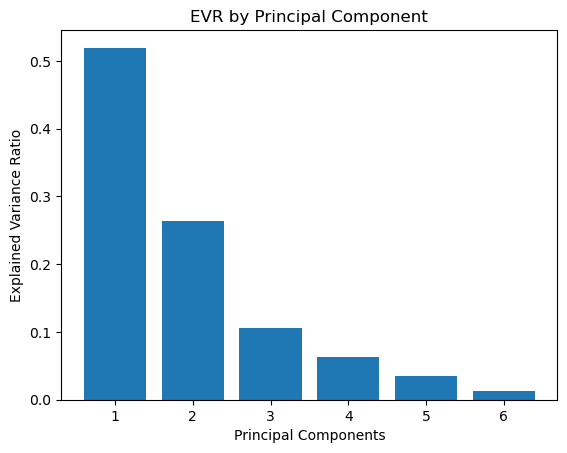

In [40]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('EVR by Principal Component')
plt.show()

In [41]:
# Print explained variance ratio for each component
for component, ratio in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PCA{component}: {ratio:.4f}")

PCA1: 0.5195
PCA2: 0.2641
PCA3: 0.1061
PCA4: 0.0626
PCA5: 0.0350
PCA6: 0.0128


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Using KMeans and hierarchical clustering, I identified customer segments based on the purchasing behavior across the different product categories. KMeans yielded clusters with varying spending patterns, such as one group showing high spending on Grocery, Milk, and Detergents_Paper, while another group primarily purchased Fresh products. Perhaps there may be a way to tackle the outliers in more details with more time.

- Looking at the PCA and RF techniques, I found that Detergents_Paper contributes to about 84.4% of predictive power. This means that people that purchase Detergents_Paper are also likely to purchase Grocery items. Using the heatmap and the correlation matrix, this supports the findings.

- Outliers could present some challenges when trying to review the spending behavior. We could possibly remove these and see if the trend/behaviors become clearer, particularly for other groups like Fresh products.

- The segmentation of customers into distinct clusters offers valuable insights for business strategies and decision-making. Businesses can tailor marketing campaigns and product offerings to cater to the preferences of specific customer segments. Through the identified clusters, we noticed that different customer segments exhibit distinct spending behaviors. This implies that various customer groups might respond differently to promotions, discounts, or changes in product availability.